In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = "./data/git_metrics/"

In [2]:
fast_commit = pd.read_csv(path+"fast_commit.csv")
fast_issue = pd.read_csv(path+"fast_issue.csv")
fast_pr = pd.read_csv(path+"fast_pr.csv")

In [3]:
fast_rmw_commit = pd.read_csv(path+"fast_rmw_commit.csv")
fast_rmw_issue = pd.read_csv(path+"fast_rmw_issue.csv")
fast_rmw_pr = pd.read_csv(path+"fast_rmw_pr.csv")
print(len(fast_rmw_pr))

79


In [4]:
cyclone_commit = pd.read_csv(path+"cyclone_commit.csv")
cyclone_issue = pd.read_csv(path+"cyclone_issue.csv")
cyclone_pr = pd.read_csv(path+"cyclone_pr.csv")

In [5]:
cyclone_rmw_commit = pd.read_csv(path+"cyclone_rmw_commit.csv")
cyclone_rmw_issue = pd.read_csv(path+"cyclone_rmw_issue.csv")
cyclone_rmw_pr = pd.read_csv(path+"cyclone_rmw_pr.csv")

In [10]:
# Count the total open and closed PR and issues

pr_set = [fast_pr,fast_rmw_pr,cyclone_pr,cyclone_rmw_pr]
issue_set = [fast_issue,fast_rmw_issue,cyclone_issue,cyclone_rmw_issue]
names = ["eProsima/Fast-RTPS", "ros2/rmw_fastrtps", "eclipse-cyclonedds/cyclonedds", "ros2/rmw_cyclonedds"]


# Open and Closed PRs
closed_pr = []
still_open_pr = []
for df in pr_set:
    vals = df["state"].value_counts()
    if "open" in vals.keys():
        still_open_pr.append(vals["open"])
    else: # no open PRS!!! 
        still_open_pr.append(0)

    if "closed" in vals.keys():
        closed_pr.append(vals["closed"])
    else: # no open PRS!!! 
        closed_pr.append(0)
        
        
closed_issues = []
still_open_issues = []
for df in issue_set:
    vals = df["state"].value_counts()
    if "open" in vals.keys():
        still_open_issues.append(vals["open"])
    else: # no open PRS!!! 
        still_open_issue.append(0)

    if "closed" in vals.keys():
        closed_issues.append(vals["closed"])
    else: # no open PRS!!! 
        closed_issues.append(0)        
               
print(still_open_pr,closed_pr)
print(still_open_issues,closed_issues)

[24, 4, 19, 3] [232, 75, 80, 71]
[41, 11, 32, 11] [290, 82, 89, 85]


[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]


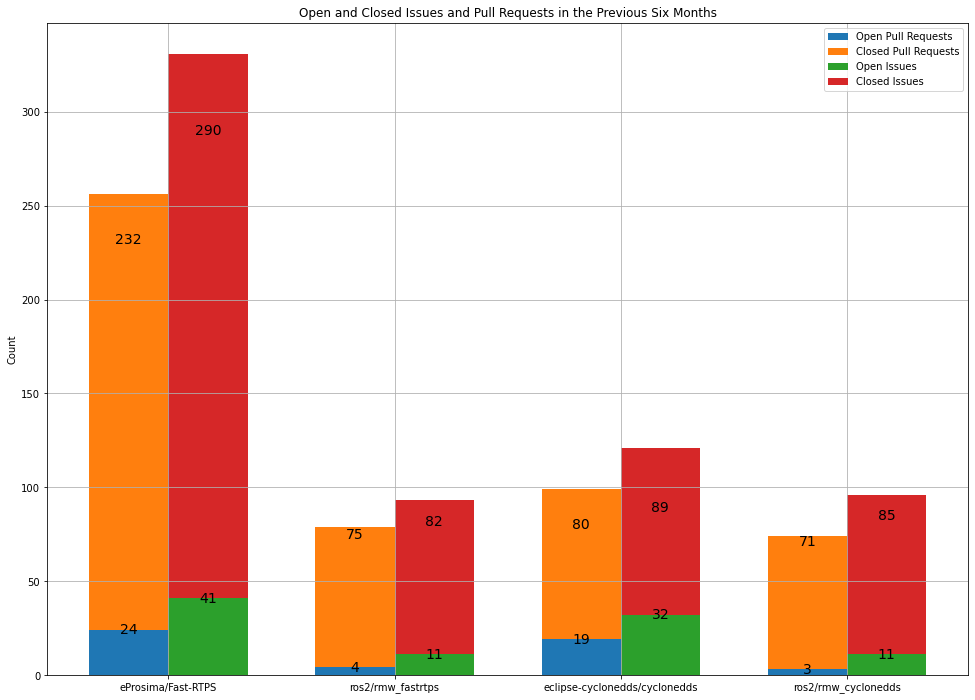

In [11]:
def autolabel(rects,offs=None):
    """Attach a text label above each bar in *rects*, displaying its height."""
    if offs is None:
        offs = [0 for i in range(0,len(rects))]
    print(offs)
    for rect,off in zip(rects,offs):
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height+off),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize =14,
                    ha='center', va='center',rotation=0)

N = len(closed_pr)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(16.5,12) 

p1 = plt.bar(ind, still_open_pr, width)

p2 = plt.bar(ind, closed_pr, width,bottom=still_open_pr)

p3 = plt.bar(ind+width, still_open_issues, width)

p4 = plt.bar(ind+width, closed_issues, width,
             bottom=still_open_issues,)

autolabel(p1)
autolabel(p2, offs=[0,0,0,0])
autolabel(p3)
autolabel(p4, offs=[0,0,0,0])


plt.ylabel('Count')
plt.title('Open and Closed Issues and Pull Requests in the Previous Six Months')
plt.xticks(ind+(width/2), names)
plt.legend(('Open Pull Requests','Closed Pull Requests', 'Open Issues','Closed Issues'))
plt.grid()
plt.savefig("./plots/PullRequestsAndIssues.png")
plt.show()

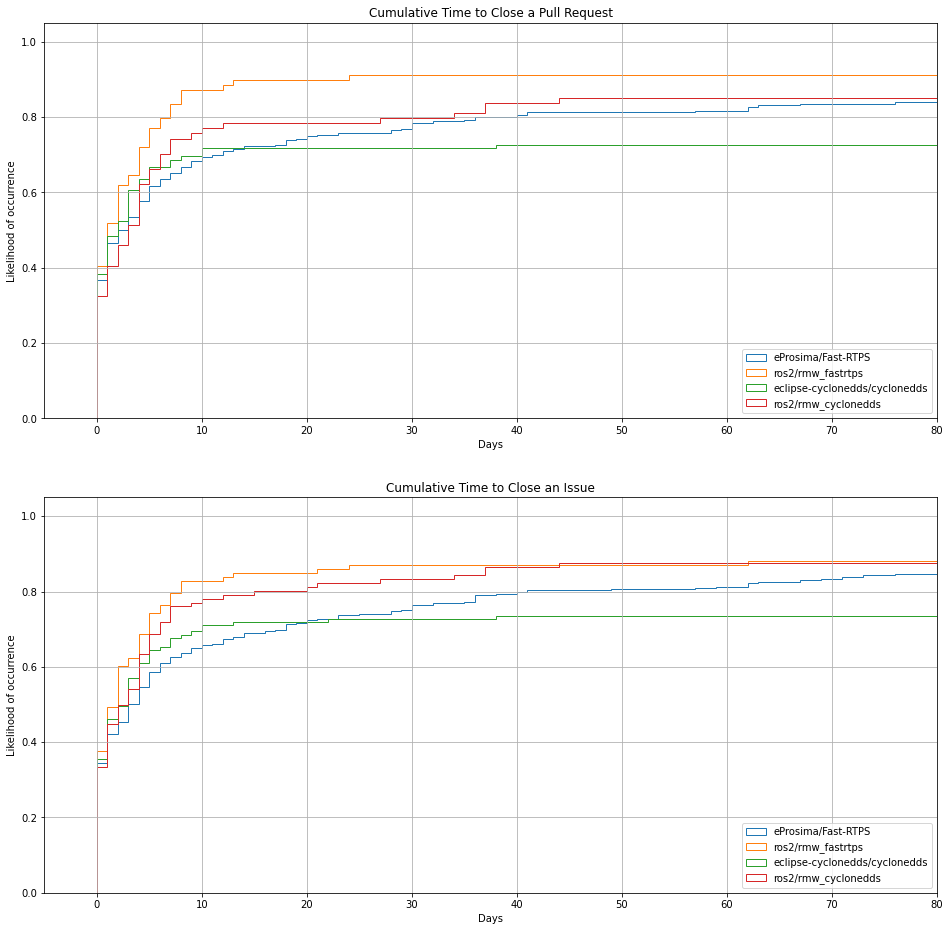

In [12]:
# Now do PR / Issue Burn Downs
fig, ax = plt.subplots(2,figsize=(16, 16))
n_bins = 30*6 # bin per day
# convert Six months to seconds 
total_period = 6*30*24*60*60

for name,df in zip(names,pr_set):
    ax[0].set_xlim((-5,80)) # cap at 100 days 
    x = np.array(df["time_to_close"].fillna(total_period).tolist()) / ((60.0**2)*24) # convert to days
    # plot the cumulative histogram
    n, bins, patches = ax[0].hist(x, n_bins, density=True, histtype='step',
                               cumulative=True, label=name)


# tidy up the figure
ax[0].grid(True,which="both")
ax[0].legend(loc='lower right')
ax[0].set_title('Cumulative Time to Close a Pull Request')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Likelihood of occurrence')


for name,df in zip(names,issue_set):
    ax[1].set_xlim((-5,80)) # cap at 100 days 

    x = np.array(df["turn_round"].fillna(total_period).tolist()) / ((60.0**2)*24) # convert to days
# plot the cumulative histogram
    n, bins, patches = ax[1].hist(x, n_bins, density=True, histtype='step',
                               cumulative=True, label=name)


# tidy up the figure
ax[1].grid(True,which="both")
ax[1].legend(loc='lower right')
ax[1].set_title('Cumulative Time to Close an Issue')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Likelihood of occurrence')


plt.savefig("./plots/IssueAndPRTurnAround.png")
plt.show()

In [ ]:
fast_issue.head()